<a href="https://colab.research.google.com/github/Tanushree-233/Machine_Learning/blob/main/ML_7_GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv
Saving data.dat to data.dat
Saving output.csv to output.csv


In [ ]:
import pandas as pd

df = pd.read_csv('data.csv')
display(df.head())
display(df.info())

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

None

In [ ]:
# 1. Identify and handle any missing values
# Check for missing values
print("Missing values before handling:")
display(df.isnull().sum())

# In this dataset, there are no apparent missing values based on df.info() and isnull().sum()
# If there were, we would handle them here, e.g., using df.dropna() or df.fillna()

# 2. Identify categorical columns and convert to numerical
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical columns:")
print(categorical_cols)

# The categorical columns are 'date', 'street', 'city', 'statezip', and 'country'.
# 'date' can be converted to datetime objects, but we will drop it later.
# 'street', 'city', 'statezip', and 'country' are nominal categories. Since we plan to drop them,
# we don't need to convert them for this specific task (linear regression features).
# If we were to use them, we would use one-hot encoding for nominal features.

# 3. Select features
# Drop irrelevant columns for linear regression
df_processed = df.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1)
print("\nDataFrame after dropping irrelevant columns:")
display(df_processed.head())

# Separate features (X) and target (y)
X = df_processed.drop('price', axis=1)
y = df_processed['price']

# 4. Scale the selected numerical features
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for easier handling if needed, though numpy array is fine
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\nScaled features (first 5 rows):")
display(X_scaled_df.head())

# 5. Separate the scaled features and the target variable
# X_scaled is already separated
# y is already separated

Missing values before handling:


,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0



Categorical columns:
Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object')

DataFrame after dropping irrelevant columns:


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992



Scaled features (first 5 rows):


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,-0.085004,-0.309194,-0.667112,-0.565224,-0.672464,-0.531014,1.221670
1,1.759705,0.432802,1.568528,-0.161718,0.906555,-0.085004,4.830079,2.286416,1.789559,-0.069128,-1.674693,-0.825693
2,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,-0.085004,-0.309194,0.809652,0.119171,-0.672464,-0.161000,-0.825693
3,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,-0.085004,-0.309194,0.809652,-0.959621,1.482306,-0.261913,-0.825693
4,0.659291,0.432802,-0.206984,-0.121306,-0.951388,-0.085004,-0.309194,0.809652,-0.797222,1.051352,0.175376,1.208396


In [ ]:
import numpy as np

def compute_cost(X, y, theta):
  """
  Computes the cost of linear regression.

  Args:
    X: The input features (including a column of ones).
    y: The target variable.
    theta: The model parameters.

  Returns:
    The calculated cost (Mean Squared Error).
  """
  m = len(y)  # Number of training examples
  h = X @ theta  # Predicted values
  err = h - y  # Error
  J = (1 / (2 * m)) * np.sum(err**2)  # Mean Squared Error
  return J

In [ ]:
def gradient_descent(X, y, theta, alpha, num_iters):
  """
  Performs gradient descent to learn theta.

  Args:
    X: The input features (including a column of ones).
    y: The target variable.
    theta: The initial model parameters.
    alpha: The learning rate.
    num_iters: The number of iterations.

  Returns:
    theta: The learned parameters.
    J_history: A list of the cost after each iteration.
  """
  m = len(y)  # Number of training examples
  J_history = []  # Initialize history of cost

  for i in range(num_iters):
    # Calculate the gradient
    h = X @ theta
    err = h - y
    gradient = (1 / m) * X.T @ err

    # Update parameters
    theta = theta - alpha * gradient

    # Calculate and store the cost
    cost = compute_cost(X, y, theta)
    J_history.append(cost)

  return theta, J_history

In [ ]:
# 1. Add a column of ones to the scaled feature DataFrame X_scaled_df
X_b = X_scaled_df.copy()
X_b.insert(0, 'intercept', 1)

# 2. Initialize the model parameters theta with a vector of zeros
theta = np.zeros(X_b.shape[1])

# 3. Set the learning rate alpha and the number of iterations num_iters
alpha = 0.01
num_iters = 1500

# 4. Call the gradient_descent function to train the model
theta_final, J_history = gradient_descent(X_b, y, theta, alpha, num_iters)

# 5. Store the returned learned parameters and the history of the cost
print("Learned parameters (theta_final):")
print(theta_final)
print("\nLast 10 cost values from J_history:")
print(J_history[-10:])

Learned parameters (theta_final):
intercept        551962.831906
bedrooms         -52632.439614
bathrooms         44984.025607
sqft_living      124569.837183
sqft_lot         -24763.279391
floors            21411.817616
waterfront        29985.088550
view              35637.421505
condition         21630.777692
sqft_above       113656.008096
sqft_basement     47390.821322
yr_built         -70625.289134
yr_renovated       6507.241360
dtype: float64

Last 10 cost values from J_history:
[np.float64(124307468346.68886), np.float64(124307468208.38902), np.float64(124307468071.1655), np.float64(124307467935.00981), np.float64(124307467799.91335), np.float64(124307467665.86772), np.float64(124307467532.86452), np.float64(124307467400.89542), np.float64(124307467269.95218), np.float64(124307467140.02669)]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# 1. Calculate the predicted values (y_pred)
y_pred = X_b @ theta_final

# 2. Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# 3. Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# 4. Calculate the R-squared score
r2 = r2_score(y, y_pred)

# 5. Print the calculated MSE, RMSE, and R-squared score
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 248614934280.05338
Root Mean Squared Error (RMSE): 498613.010540292
R-squared (R2) Score: 0.2177996046121652


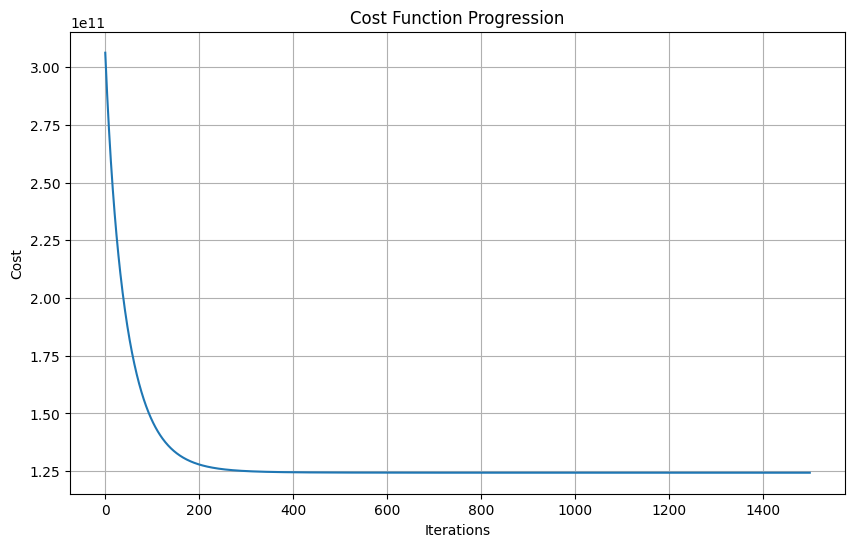

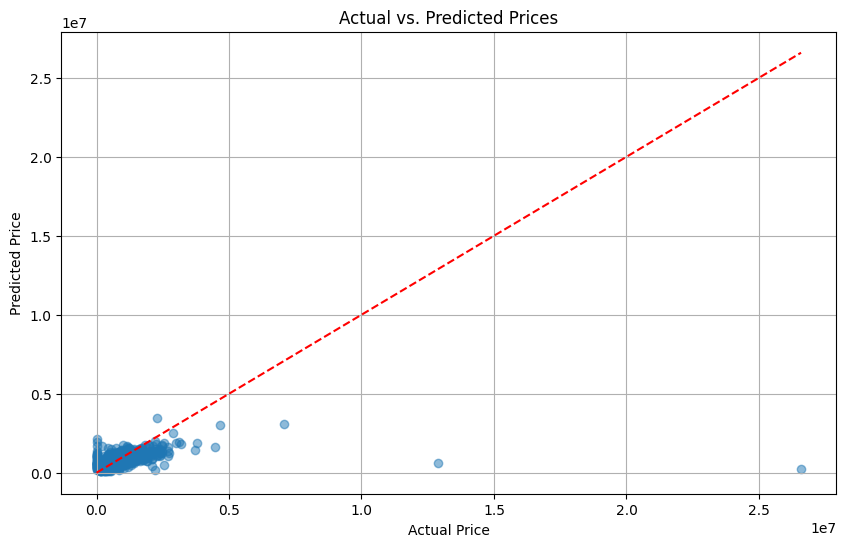

In [ ]:
import matplotlib.pyplot as plt

# Plot the cost function over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(num_iters), J_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Progression")
plt.grid(True)
plt.show()

# Create a scatter plot of actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices")
plt.grid(True)

# Add a diagonal line where actual and predicted values are equal
max_price = max(y.max(), y_pred.max())
min_price = min(y.min(), y_pred.min())
plt.plot([min_price, max_price], [min_price, max_price], color='red', linestyle='--')

plt.show()